In [1]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt
import time

**Код**

In [2]:
def plot_levels(Q_def, lx=-5, rx=5, ly=-5, ry=5, gridsize=50, levels=(50), path=None):
    plt.figure()
    a = np.linspace(lx, rx, gridsize)
    b = np.linspace(ly, ry, gridsize)
    _x, _y = np.meshgrid(a, b)
    c = plt.contour(_x, _y, Q_def([_x, _y]), levels)
    if path != None:
        c = plt.scatter(path[0], path[1], s=1)
    plt.grid()
    plt.show(c)

In [3]:
def antigradient(Q):
    return [-1*sp.diff(Q, x), -1*sp.diff(Q, y)]

def gradient(Q):
    return [sp.diff(Q, x), sp.diff(Q, y)]

def gradient_value(sp_grad, _x, _y):
    grad_value = [sp_grad[0].evalf(subs={x:_x, y:_y}), sp_grad[1].evalf(subs={x:_x, y:_y})]
    return grad_value

def antigradient_value_norm(sp_antigrad, _x, _y):
    antigrad_value = [sp_antigrad[0].evalf(subs={x:_x, y:_y}), sp_antigrad[1].evalf(subs={x:_x, y:_y})]
    norm = sqrt(antigrad_value[0]**2 + antigrad_value[1]**2)
    return norm

def antigradient_normalized_value(sp_antigrad, _x, _y):
    antigrad_value = [sp_antigrad[0].evalf(subs={x:_x, y:_y}), sp_antigrad[1].evalf(subs={x:_x, y:_y})]
    norm = sqrt(antigrad_value[0]**2 + antigrad_value[1]**2)
    return [antigrad_value[0] / norm, antigrad_value[1] / norm]

def Q_value(Q, _x, _y):
    return Q.evalf(subs={x:_x, y:_y})

In [4]:
def gradient_descent(Q, Q_def, max_iter_count, start_x=0, start_y=0, stop_eps=1e-3):
    t0 = time.time()
    path_x = []
    path_y = []
    
    antigrad = antigradient(Q)
    grad = gradient(Q)
    
    iter_counter = 0
    
    # Ахуенный алгоритм вычисления смещения в методичке. Понятность 12/10
    # хз че делать
    xk = 0.01 
    
    curr_x = start_x
    curr_y = start_y
    path_x.append(curr_x)
    path_y.append(curr_y)
    
    # выход по числу итераций или малости градиента
    while iter_counter < max_iter_count and antigradient_value_norm(antigrad, curr_x, curr_y) > stop_eps:
        iter_counter += 1
        dk = antigradient_normalized_value(antigrad, curr_x, curr_y)

        curr_x = curr_x + dk[0] * xk
        curr_y = curr_y + dk[1] * xk
        path_x.append(curr_x)
        path_y.append(curr_y)
    print(f'Time: {time.time()-t0} seconds')
    return (curr_x, curr_y), (path_x, path_y), iter_counter

## Rosenbrock

In [5]:
x = sp.symbols('x')
y = sp.symbols('y')

In [6]:
Rosenbrock = (1-x)**2 + 100*(y-x**2)**2

In [7]:
Rosenbrock

(1 - x)**2 + 100*(-x**2 + y)**2

In [8]:
def rosenbrock_def(x):
  return (1-x[0])**2 + 100*(x[1]-x[0]**2)**2

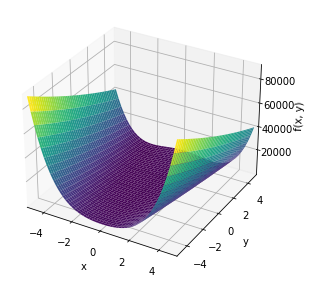

In [9]:
sp.plotting.plot3d(Rosenbrock, (x, -5, 5), (y, -5 , 5))

In [10]:
res_point, res_path, iter_count = gradient_descent(Rosenbrock, rosenbrock_def, 10000, -5, -5)

Time: 8.722001791000366 seconds


In [11]:
res_point

(0.994482494238147, 0.977897737864402)

In [12]:
Q_value(Rosenbrock, res_point[0], res_point[1])

0.0123463229312606

In [13]:
iter_count

10000

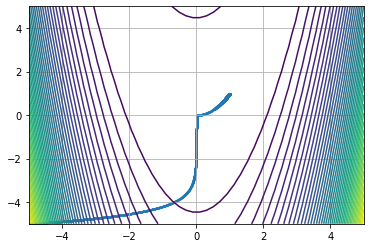

In [14]:
plot_levels(rosenbrock_def, path=res_path)

## Goldstein–Price

In [15]:
x = sp.symbols('x')
y = sp.symbols('y')

In [16]:
Goldstein = (1+((x+y+1)**2)*(19-14*x+3*x**2-14*y+6*x*y+3*y**2))*(30+((2*x-3*y)**2)*(18-32*x+12*x**2+48*y-36*x*y+27*y**2))

In [17]:
Goldstein

((2*x - 3*y)**2*(12*x**2 - 36*x*y - 32*x + 27*y**2 + 48*y + 18) + 30)*((x + y + 1)**2*(3*x**2 + 6*x*y - 14*x + 3*y**2 - 14*y + 19) + 1)

In [18]:
def goldstein_def(x):
  return (1+((x[0]+x[1]+1)**2)*(19-14*x[0]+3*x[0]**2-14*x[1]+6*x[0]*x[1]+3*x[1]**2))*(30+((2*x[0]-3*x[1])**2)*(18-32*x[0]+12*x[0]**2+48*x[1]-36*x[0]*x[1]+27*x[1]**2))

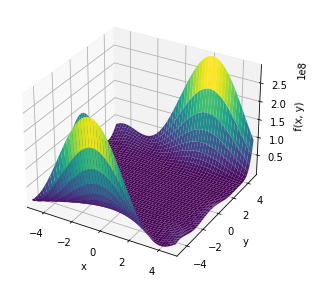

In [19]:
sp.plotting.plot3d(Goldstein, (x, -5, 5), (y, -5 , 5))

In [20]:
res_point, res_path, iter_count = gradient_descent(Goldstein, goldstein_def, 10000, -5, -5)

KeyboardInterrupt: 

In [ ]:
res_point

In [ ]:
Q_value(Goldstein, res_point[0], res_point[1])

In [ ]:
iter_count

In [ ]:
plot_levels(goldstein_def, path=res_path)

## Matyas

In [ ]:
x = sp.symbols('x')
y = sp.symbols('y')

In [ ]:
Matyas = 0.26*(x**2+y**2)-0.48*x*y

In [ ]:
Matyas

In [ ]:
def matyas_def(x):
  return (0.26*(x[0]**2+x[1]**2)-0.48*x[0]*x[1])

In [ ]:
sp.plotting.plot3d(Matyas, (x, -5, 5), (y, -5 , 5))

In [ ]:
res_point, res_path, iter_count = gradient_descent(Matyas, matyas_def, 10000, -5, -5)

In [ ]:
res_point

In [ ]:
Q_value(Matyas, res_point[0], res_point[1])

In [ ]:
iter_count

In [ ]:
plot_levels(matyas_def, path=res_path)

## Himmelblau's

In [ ]:
x = sp.symbols('x')
y = sp.symbols('y')

In [ ]:
Himmel = (x**2+y-11)**2+(x+y**2-7)**2

In [ ]:
Himmel

In [ ]:
def himmel_def(x):
  return (x[0]**2+x[1]-11)**2+(x[0]+x[1]**2-7)**2

In [ ]:
sp.plotting.plot3d(Himmel, (x, -5, 5), (y, -5 , 5))

In [ ]:
res_point, res_path, iter_count = gradient_descent(Himmel, himmel_def, 10000, -5, -5)

In [ ]:
res_point

In [ ]:
Q_value(Himmel, res_point[0], res_point[1])

In [ ]:
iter_count

In [ ]:
plot_levels(himmel_def, path=res_path)